In [1]:
# Gerekli kütüphaneleri yüklüyoruz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # confusion matrix görselleştirme için


In [2]:
# Veri setini yüklüyoruz
df = pd.read_csv("wdbc.csv")  # kendi dosya adın farklıysa değiştir

# İlk 5 satırı görüntüleyerek veri yapısını inceleyelim
df.head()


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
# Kolon isimlerini güncelle (eğer yoksa)
df.columns = [
    "id", "diagnosis",  # M = malign, B = benign

    # Mean özellikleri
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",

    # Standart hata özellikleri
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",

    # En kötü değerler
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]


In [4]:
# Tanı bilgisi: M = 1 (kötü huylu), B = 0 (iyi huylu)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# 'id' sütunu model için gereksiz, siliyoruz
df = df.drop("id", axis=1)


In [5]:
# X: giriş verisi, y: hedef sınıf (0 veya 1)
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [6]:
# Veriyi %80 eğitim, %20 test olacak şekilde ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Karar ağaçlarında genelde zorunlu değil ama istersek normalize edebiliriz
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Karar Ağacı modelini tanımlayıp eğitiyoruz
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
# Tahmin yapıyoruz
y_pred = model.predict(X_test)

# Doğruluk oranı
acc = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {acc:.4f}")


Doğruluk Oranı: 0.9211


In [10]:
# Sınıflandırma raporu ve karmaşıklık matrisi
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.91      0.89      0.90        46

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



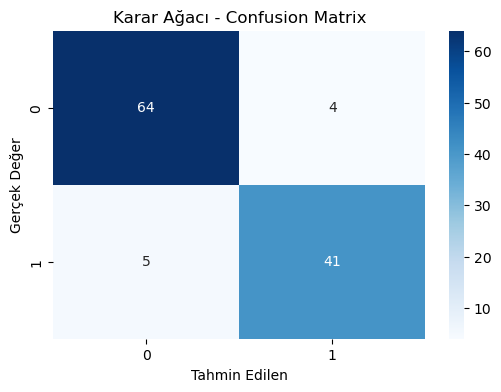

In [11]:
# Confusion Matrix görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Karar Ağacı - Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.show()


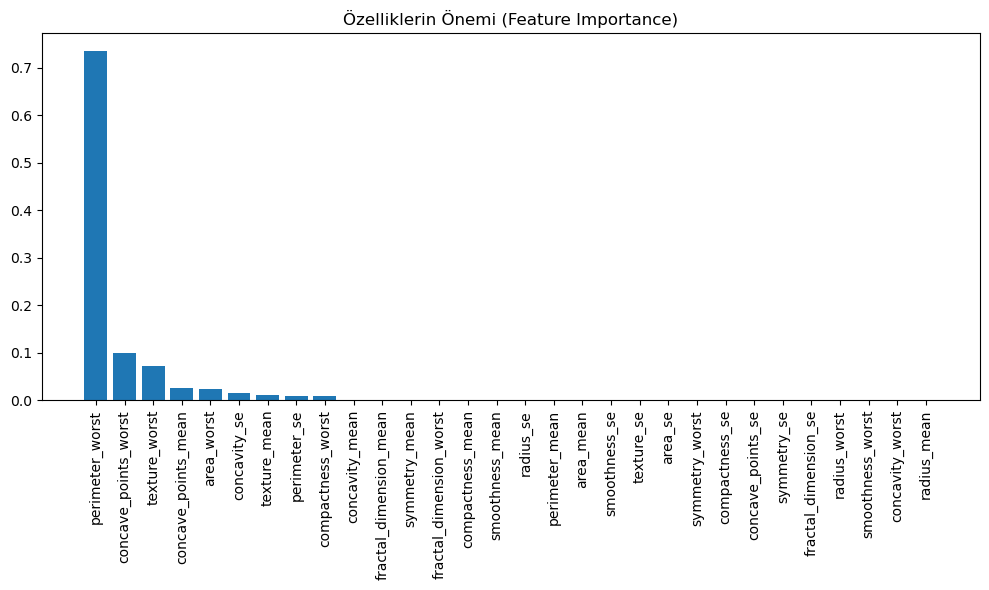

In [12]:
# Karar Ağacı'nın hangi özelliklere ne kadar önem verdiğini göster
importances = model.feature_importances_
feature_names = X.columns

# Sıralayıp çiziyoruz
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Özelliklerin Önemi (Feature Importance)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


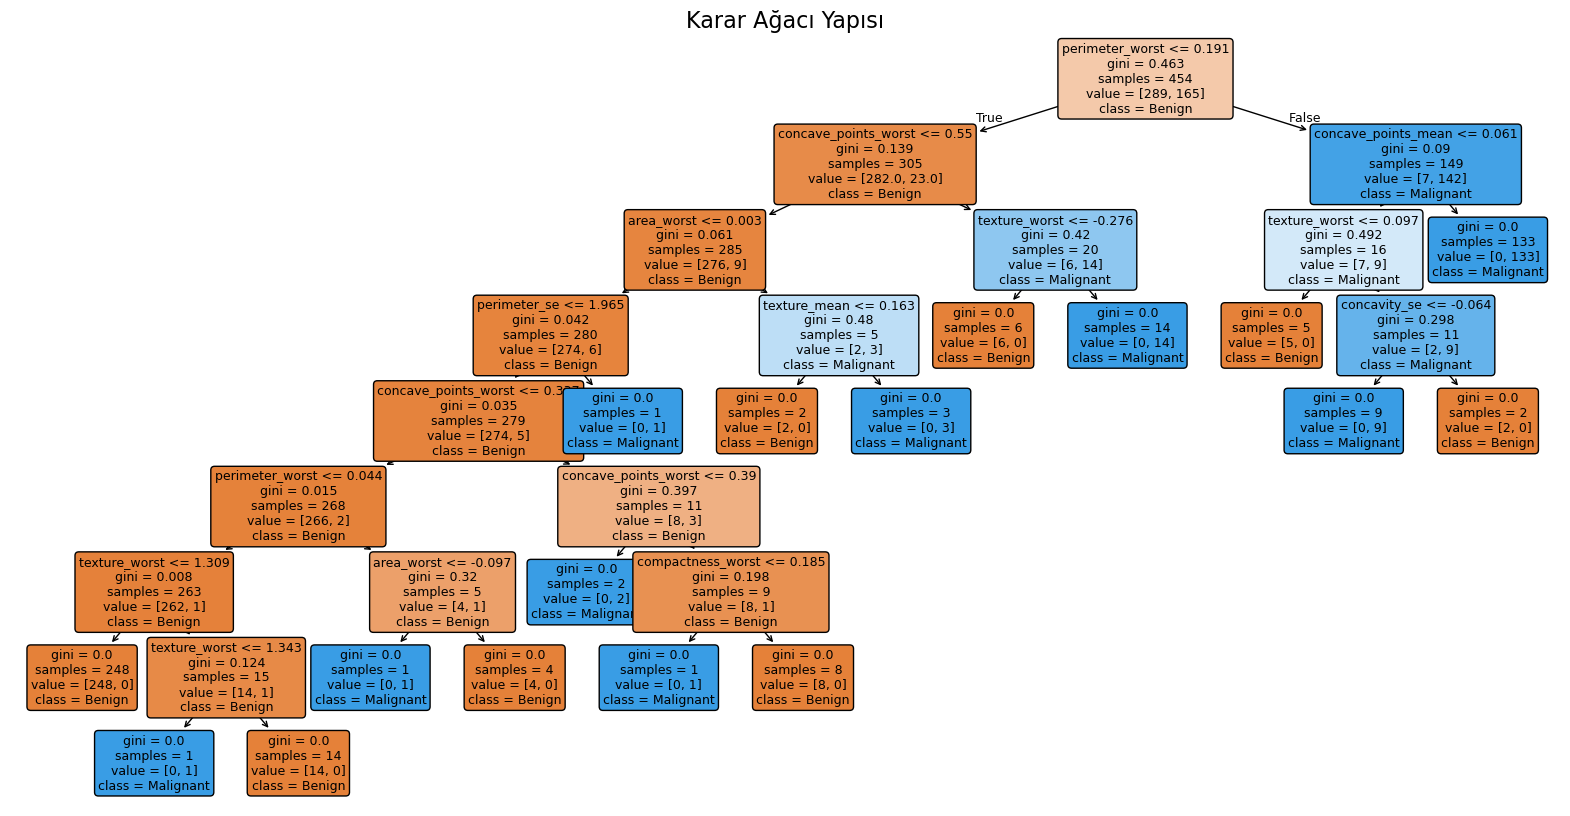

In [13]:
from sklearn.tree import plot_tree

# Karar ağacının yapısını çiziyoruz
plt.figure(figsize=(20, 10))  # Boyut isteğe göre artırılabilir
plot_tree(
    model, 
    feature_names=X.columns, 
    class_names=["Benign", "Malignant"],  # 0,1 sınıflarının etiketleri
    filled=True,                          # Renkli bloklar
    rounded=True,                         # Kenarlar yuvarlak
    fontsize=9                            # Yazı boyutu
)
plt.title("Karar Ağacı Yapısı", fontsize=16)
plt.show()
